# 1.Configuración del ambiente


## 1.1 Variables

In [ ]:
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

## 1.2 Librerias

In [2]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.11.11
------
Name: pandas
Version: 2.2.2
------
Name: numpy
Version: 1.26.4
Name: lapack-lite
Name: tempita
Name: dragon4
Name: libdivide
Name: Meson
Name: spin
Name: OpenBLAS
Name: LAPACK
Name: GCC runtime library
Version 3.1, 31 March 2009
                       Version 3, 29 June 2007
  5. Conveying Modified Source Versions.
  14. Revised Versions of this License.
Name: libquadmath
------
Name: matplotlib
Version: 3.10.0


# 2.Obtención de datos

In [3]:
# Instalar la biblioteca yfinance si aún no está instalada
!pip install yfinance

## 2.1 Obtener el historico del bitcoin con yfinance

In [4]:
from datetime import datetime,timedelta
import yfinance as yf

In [5]:
def importar_base_bitcoin():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

  hoy = datetime.now()
  inicio = hoy - timedelta(days=7)
  print(inicio)

  # Descargar el histórico de precios de Bitcoin (BTC-USD) de los últimos 7 días con intervalos de 5 minutos
  df_bitcoin = yf.download('BTC-USD', start = inicio, end=hoy ,interval='5m')

  # Mostrar las primeras filas para asegurarnos de que los datos se cargaron correctamente
  print(df_bitcoin.head())

# Llamar a la función para importar los datos
importar_base_bitcoin()


[*********************100%***********************]  1 of 1 completed

2025-02-03 20:27:10.820412
Price                              Close           High            Low  \
Ticker                           BTC-USD        BTC-USD        BTC-USD   
Datetime                                                                 
2025-02-03 20:25:00+00:00  101865.562500  101989.414062  101865.562500   
2025-02-03 20:30:00+00:00  101941.437500  101941.437500  101768.460938   
2025-02-03 20:35:00+00:00  101808.367188  101907.187500  101808.367188   
2025-02-03 20:40:00+00:00  101558.906250  101825.257812  101558.906250   
2025-02-03 20:45:00+00:00  101524.140625  101524.140625  101324.742188   

Price                               Open     Volume  
Ticker                           BTC-USD    BTC-USD  
Datetime                                             
2025-02-03 20:25:00+00:00  101989.414062          0  
2025-02-03 20:30:00+00:00  101768.460938   75497472  
2025-02-03 20:35:00+00:00  101907.187500  255598592  
2025-02-03 20:40:00+00:00  101759.281250  102424576  
20

## 2.2 Obtener el precio actual y la tendecia del bitcoin con Web Scraping

In [6]:
# Importar las bibliotecas necesarias
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [7]:
def extraer_tendencias():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

  # Obtener los datos de coinmarketcap con BeatufiulSoup
  url = 'https://coinmarketcap.com/es/'
  response = urlopen(url)
  html = response.read()
  soup = BeautifulSoup(html, 'html.parser')

  # Precio actual del bitcoin
  precio_element = soup.find('td',style="text-align:end")
  precio_actual = float(precio_element.div.span.getText().replace('$','').replace(',',''))

  # Porcentaje de tendencia en una hora
  tendencia_element = soup.find('td',style="text-align:end").find_next_sibling()
  porcentaje = tendencia_element.span.getText()

  # Tendencia
  if tendencia_element.span.span['class'][0] == 'icon-Caret-down':
    tendencia = 'baja'
  else:
    tendencia = 'alta'

  # Imprimir los resultados para verificar
  print(f"Precio Actual del Bitcoin: {precio_actual} USD")
  print(f"Variación en la última hora: {porcentaje}")
  print(f"Tendencia: {tendencia}")

extraer_tendencias()

Precio Actual del Bitcoin: 97284.95 USD
Variación en la última hora: 0.32%
Tendencia: baja


# 3.Limpieza de datos

In [8]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df_bitcoin.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,
2025-02-03 20:25:00+00:00,101865.562500,101989.414062,101865.562500,101989.414062,0
2025-02-03 20:30:00+00:00,101941.437500,101941.437500,101768.460938,101768.460938,75497472
2025-02-03 20:35:00+00:00,101808.367188,101907.187500,101808.367188,101907.187500,255598592
2025-02-03 20:40:00+00:00,101558.906250,101825.257812,101558.906250,101759.281250,102424576
2025-02-03 20:45:00+00:00,101524.140625,101524.140625,101324.742188,101490.148438,38338560


In [10]:
df_bitcoin.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

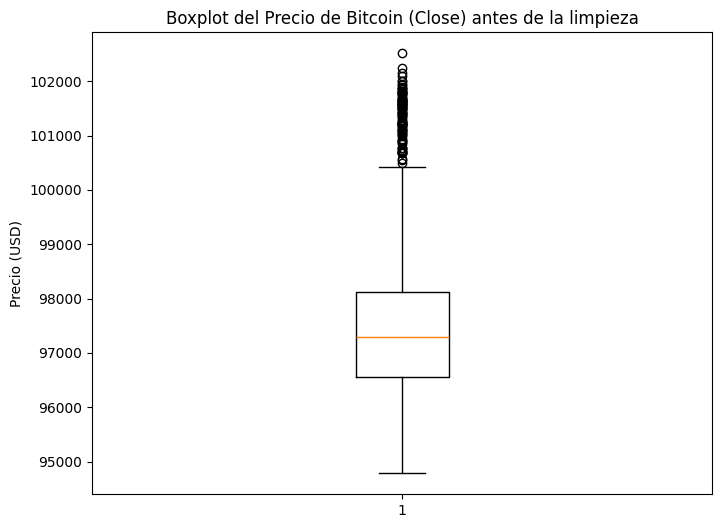

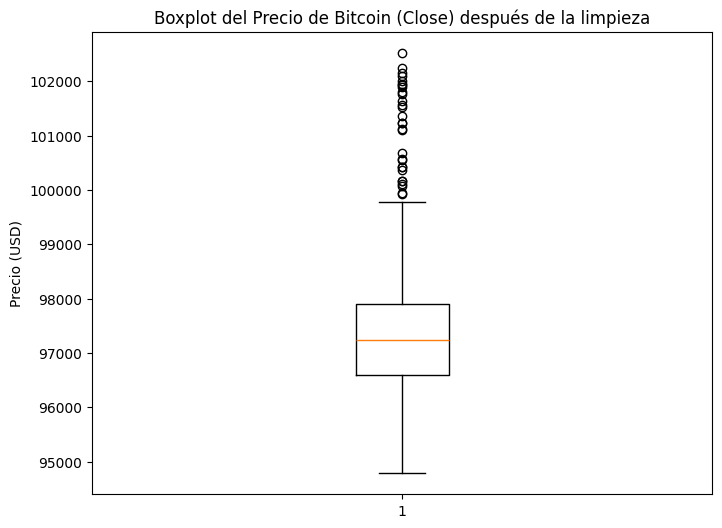

Precio promedio de Bitcoin (media): 97214.455859375
Registros después de la limpieza: 480


In [11]:
def limpieza_datos():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

    # Copia de df_bitcoin para limpiar
    df_bitcoin_limpio = df_bitcoin.copy()

    # 1. Identificar y tratar duplicados en el índice (Datetime) además de limpieza en formato Fecha
    df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]
    df_bitcoin_limpio.reset_index(inplace=True)
    df_bitcoin_limpio['Datetime'] = df_bitcoin_limpio['Datetime'].dt.strftime("%d/%m/%Y %H:%M")
    df_bitcoin_limpio.set_index('Datetime', inplace=True)

    # 2. Boxplot antes de la limpieza
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_bitcoin_limpio[('Close', 'BTC-USD')])
    plt.title('Boxplot del Precio de Bitcoin (Close) antes de la limpieza')
    plt.ylabel('Precio (USD)')
    plt.show()

    # 3. Buscar valores nulos en la columna 'Close' y eliminarlos
    df_bitcoin_limpio = df_bitcoin_limpio.dropna(subset=[('Close', 'BTC-USD')])

    # 4. Eliminar registros donde el Volume sea menor o igual a 0
    df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio[('Volume', 'BTC-USD')] > 0]

    # 5. Identificar outliers en la columna 'Close' utilizando un boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_bitcoin_limpio[('Close', 'BTC-USD')])
    plt.title('Boxplot del Precio de Bitcoin (Close) después de la limpieza')
    plt.ylabel('Precio (USD)')
    plt.show()

    # Calcular los cuartiles para identificar los outliers
    Q1 = df_bitcoin_limpio[('Close', 'BTC-USD')].quantile(0.25)
    Q3 = df_bitcoin_limpio[('Close', 'BTC-USD')].quantile(0.75)
    IQR = Q3 - Q1  # Rango intercuartil

    # 6. Filtrar los registros cuyo precio (Close) esté entre el Q1 y el Q3
    df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio[('Close', 'BTC-USD')] >= Q1) &
                                          (df_bitcoin_limpio[('Close', 'BTC-USD')] <= Q3)]

    # 7. Calcular el precio promedio (media) de la columna 'Close'
    media_bitcoin = df_bitcoin_limpio[('Close', 'BTC-USD')].mean()

    # Imprimir resultados para verificar
    print(f"Precio promedio de Bitcoin (media): {media_bitcoin}")
    print(f"Registros después de la limpieza: {df_bitcoin_limpio.shape[0]}")

    return df_bitcoin_limpio

# Llamar a la función para limpiar los datos
df_bitcoin_limpio = limpieza_datos()


# 4.Tomar decisiones

In [12]:
!pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=046bdae78b63f1908a5768e0ac1e3a711ea90c1ee74bb9a0187999b23c7e3fa6
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas-ta


In [13]:
# Importar pandas-ta para indicadores técnicos
import pandas_ta as ta

# Definir la función para calcular los indicadores y tomar decisiones
def tomar_decisiones():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision, color_flecha

    # Calcular el RSI con un periodo de 14 días usando el MultiIndex
    df_bitcoin[('RSI', 'BTC-USD')] = ta.rsi(df_bitcoin[('Close', 'BTC-USD')], length=14)

    # Calcular la SMA de 50 días usando el MultiIndex
    df_bitcoin[('SMA_50', 'BTC-USD')] = ta.sma(df_bitcoin[('Close', 'BTC-USD')], length=50)

    # Obtener el RSI y SMA más reciente
    rsi_actual = df_bitcoin[('RSI', 'BTC-USD')].iloc[-1]  # Último valor del RSI
    sma_50_actual = df_bitcoin[('SMA_50', 'BTC-USD')].iloc[-1]  # Último valor de la SMA de 50 días

    # Criterios de decisión
    if rsi_actual < 30 and precio_actual < sma_50_actual:
        algoritmo_decision = 'Comprar'
        color_flecha = 'green'
    elif precio_actual >= media_bitcoin and tendencia == 'baja':
        algoritmo_decision = 'Vender'
        color_flecha = 'red'
    else:
        algoritmo_decision = 'Esperar'
        color_flecha = 'orange'

    # Imprimir resultados
    print(f"RSI actual: {rsi_actual}")
    print(f"SMA 50 días actual: {sma_50_actual}")
    print(f"Decisión del algoritmo: {algoritmo_decision}")

# Llamar a la función para tomar decisiones con indicadores
tomar_decisiones()


RSI actual: 41.72374083527899
SMA 50 días actual: 97337.46640625
Decisión del algoritmo: Vender


# 5.Visualizacion

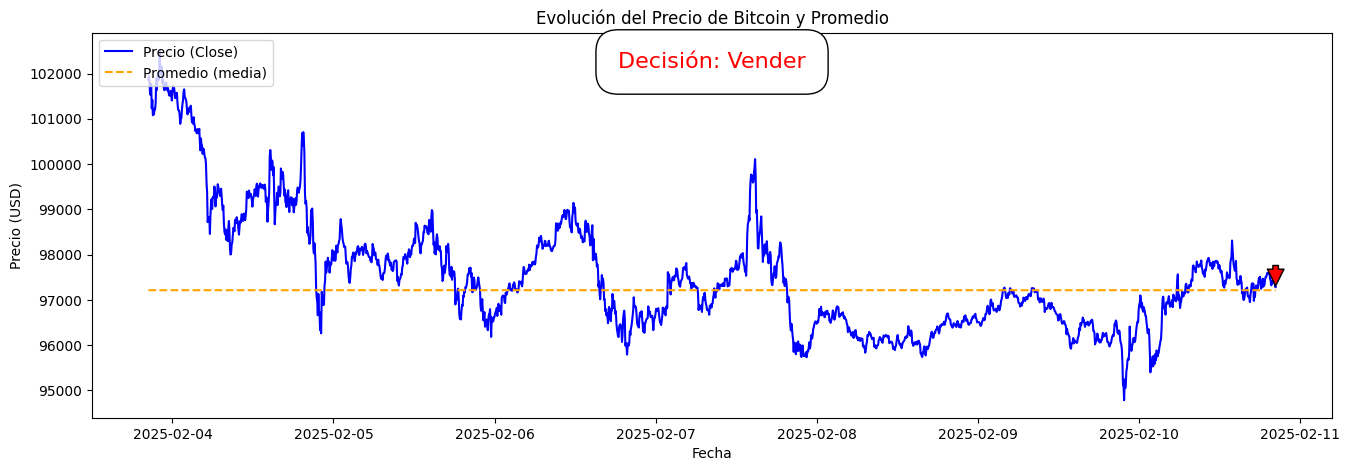

In [14]:
# Importar las bibliotecas necesarias para visualización
import matplotlib.pyplot as plt

# Definir la función de visualización
def visualizacion():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision, color_flecha

    # 1. Adicionar una nueva columna "Promedio" al dataframe df_bitcoin con el valor de media_bitcoin
    df_bitcoin[('Promedio', 'BTC-USD')] = media_bitcoin

    # 2. Configurar el tamaño del gráfico en una proporción de 16x5
    plt.figure(figsize=(16, 5))

    # 3. Adicionar un título al gráfico
    plt.title("Evolución del Precio de Bitcoin y Promedio")

    # 4. Dibujar la línea del precio "Close" en el gráfico
    plt.plot(df_bitcoin.index, df_bitcoin[('Close', 'BTC-USD')], label="Precio (Close)", color='blue')

    # 5. Dibujar la línea del "Promedio" en el gráfico
    plt.plot(df_bitcoin.index, df_bitcoin[('Promedio', 'BTC-USD')], label="Promedio (media)", color='orange', linestyle='--')

    # 6. Colocar la flecha en el último valor de 'Close'
    plt.annotate("",
                 xy=(df_bitcoin.index[-1], df_bitcoin[('Close', 'BTC-USD')].iloc[-1]),  # Último valor de 'Close'
                 xytext=(df_bitcoin.index[-1], df_bitcoin[('Close', 'BTC-USD')].iloc[-1] + 500),  # Flecha ajustada un poco más arriba
                 arrowprops=dict(facecolor=color_flecha, shrink=0.05))

    # 7. Colocar el texto de la decisión en el centro superior del gráfico
    plt.annotate(f"Decisión: {algoritmo_decision}",
                 xy=(0.5, 0.95), xycoords='axes fraction',  # Posición en el centro superior
                 fontsize=16, color=color_flecha, ha='center', va='top',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

    # 8. Configurar las etiquetas de los ejes
    plt.xlabel("Fecha")
    plt.ylabel("Precio (USD)")

    # 9. Mostrar la leyenda en la parte superior izquierda
    plt.legend(loc="upper left")

    # 10. Mostrar el gráfico
    plt.show()

# Llamar a la función para visualizar el gráfico
visualizacion()


# 6.Automatizacion

In [15]:
# Importar los métodos y bibliotecas necesarios
from IPython.display import clear_output
import time

def automatizacion():
  # Definir un loop infinito para automatizar la ejecución del código cada 5 minutos
  while True:

      # Limpiar la pantalla antes de generar un nuevo gráfico
      clear_output(wait=True)

      # Ejecutar las funciones construidas en secuencia
      importar_base_bitcoin()   # Paso 2: Obtener los datos de Bitcoin
      extraer_tendencias()      # Paso 3: Obtener las tendencias del mercado
      limpieza_datos()          # Paso 4: Limpiar los datos
      tomar_decisiones()        # Paso 5: Tomar decisiones basadas en los indicadores
      visualizacion()           # Visualizar el gráfico actualizado

      # Esperar 300 segundos (5 minutos) antes de repetir el proceso
      time.sleep(300)

2025-02-03 20:33:29.157162


[*********************100%***********************]  1 of 1 completed


Price                              Close           High            Low  \
Ticker                           BTC-USD        BTC-USD        BTC-USD   
Datetime                                                                 
2025-02-03 20:35:00+00:00  101808.367188  101907.187500  101808.367188   
2025-02-03 20:40:00+00:00  101558.906250  101825.257812  101558.906250   
2025-02-03 20:45:00+00:00  101524.140625  101524.140625  101324.742188   
2025-02-03 20:50:00+00:00  101766.781250  101766.781250  101553.453125   
2025-02-03 20:55:00+00:00  101230.265625  101630.164062  101230.265625   

Price                               Open     Volume  
Ticker                           BTC-USD    BTC-USD  
Datetime                                             
2025-02-03 20:35:00+00:00  101907.187500          0  
2025-02-03 20:40:00+00:00  101759.281250  102424576  
2025-02-03 20:45:00+00:00  101490.148438   38338560  
2025-02-03 20:50:00+00:00  101553.453125   72204288  
2025-02-03 20:55:00+00:00  10

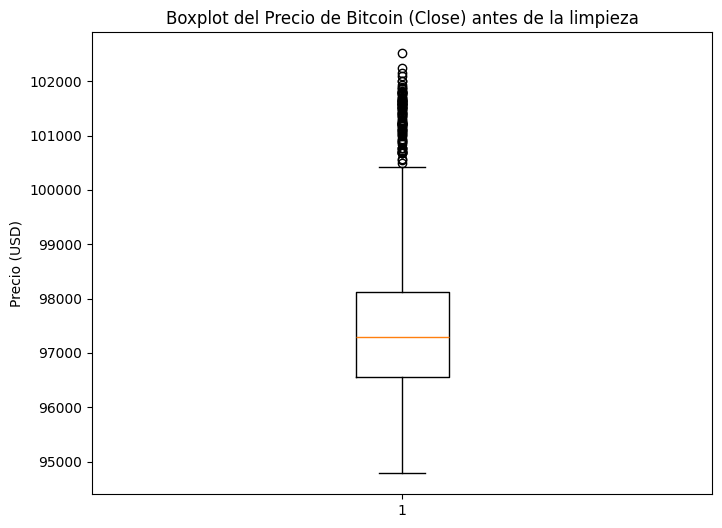

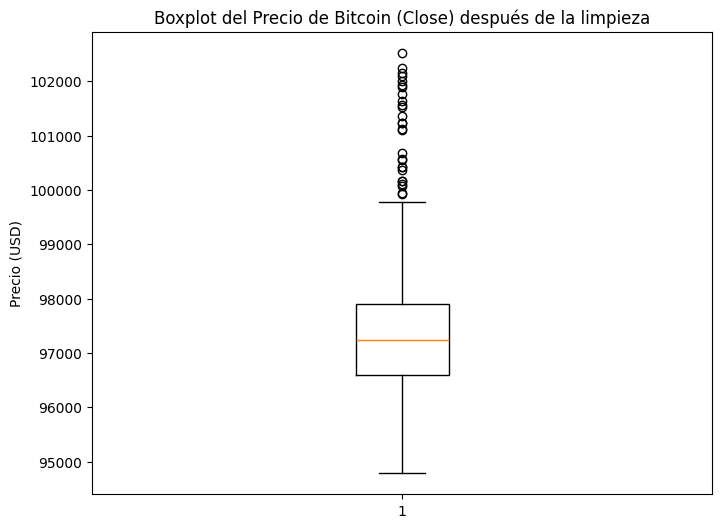

Precio promedio de Bitcoin (media): 97211.99602864584
Registros después de la limpieza: 480
RSI actual: 44.540188274907344
SMA 50 días actual: 97342.62171875
Decisión del algoritmo: Vender


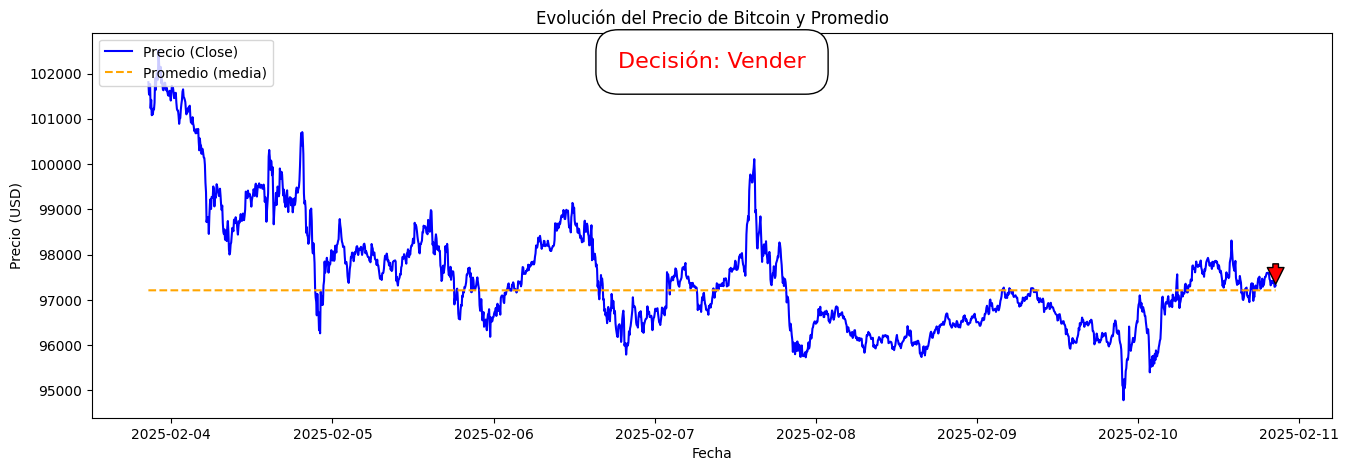

In [ ]:
automatizacion()